In [1]:
from glob import glob
import sys
import getpass
import os
from os.path import join, dirname, getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

import nilearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

OS : darwin
Google Drive is detected!
Git directory is detected!


## 1. ROI list

In [5]:
## initalizing
GA.roi_imgs = {}

1. Localizer

In [4]:
suffix = 'all_localizers'
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = nilearn.image.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7fd13973c390>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7fd13973c650>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fd13973c810>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7fd13973ca50>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fd13973cc10>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fd13973ce50>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7fd13973ce90>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fd139751290>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7fd1397514d0>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fd139751690>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7fd1397518d0>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fd139751ad0>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7fd139751c10>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fd139751ed0>,
 'n200_c7_L_Thalamus': <nibabel

In [4]:
suffix = '7localizers'
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f9fd822f9a0>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f9e5626a400>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f9e5626aca0>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f9e5626f250>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f9e5626f820>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f9e5626f4c0>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7f9e56275370>}

2. DMN

In [3]:
suffix = 'DMN'

## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_mask,'DMN',name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_mask,'DMN',name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

GA.roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7fe728841a50>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7fe729da9810>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7fe729da9a50>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729da98d0>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729da9d10>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db81d0>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729db8450>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7fe729db8510>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7fe729db8910>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7fe729db8ad0>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db8d50>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db8b90>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1150>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1410>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1610>,
 'MTLsub_PHC_r': <nibabel.nifti1.Nifti1Image

3. Yeo's network #1

In [3]:
GA.load_fan()

suffix = 'Yeo_network17_1'
## yeo_17network == 1
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]
GA.roi_imgs

{'FuG_L_3_2': <nibabel.nifti1.Nifti1Image at 0x7fa43db03c50>,
 'FuG_R_3_2': <nibabel.nifti1.Nifti1Image at 0x7fa43db039d0>,
 'MVOcC_L_5_1': <nibabel.nifti1.Nifti1Image at 0x7fa43a2fa710>,
 'MVOcC_R_5_1': <nibabel.nifti1.Nifti1Image at 0x7fa43a2fa490>,
 'MVOcC_L_5_3': <nibabel.nifti1.Nifti1Image at 0x7fa43a2f4cd0>,
 'MVOcC_R_5_3': <nibabel.nifti1.Nifti1Image at 0x7fa43a2f4a50>,
 'MVOcC_R_5_4': <nibabel.nifti1.Nifti1Image at 0x7fa43a2f4550>,
 'LOcC_L_4_1': <nibabel.nifti1.Nifti1Image at 0x7fa45a28dd10>,
 'LOcC_R_4_1': <nibabel.nifti1.Nifti1Image at 0x7fa45a28db10>,
 'LOcC_L_4_3': <nibabel.nifti1.Nifti1Image at 0x7fa45a28d390>,
 'LOcC_R_4_3': <nibabel.nifti1.Nifti1Image at 0x7fa45a28d050>,
 'LOcC_L_4_4': <nibabel.nifti1.Nifti1Image at 0x7fa45a285c10>,
 'LOcC_R_4_4': <nibabel.nifti1.Nifti1Image at 0x7fa45a285bd0>,
 'LOcC_L_2_2': <nibabel.nifti1.Nifti1Image at 0x7fa45a285450>}

In [4]:
## combining visual ROIs
## yeo_17network == 1
roi_imgs_vis1 = {}

temp = GA.fan_info[(GA.fan_info.yeo_17network == 1)]

for idx in temp.index:
    nn = temp.loc[idx,'label']
    region = temp.loc[idx,'region']
    
    path = join(GA.dir_mask,'fan280','fan.roi.GA.%03d.nii.gz'%nn)
    roi_imgs_vis1[region] = nilearn.image.load_img(path)

In [5]:
## Merging
roi_vis1 = nilearn.image.math_img(img1=roi_imgs_vis1['FuG_L_3_2'], formula="img1*0")

for _, img in roi_imgs_vis1.items():
    roi_vis1 = nilearn.image.math_img(img1=roi_vis1, img2=img, formula="(img1+img2) > 0")
GA.roi_imgs['yeo_network17_1'] = roi_vis1

GA.roi_imgs

{'FuG_L_3_2': <nibabel.nifti1.Nifti1Image at 0x7fa43db03c50>,
 'FuG_R_3_2': <nibabel.nifti1.Nifti1Image at 0x7fa43db039d0>,
 'MVOcC_L_5_1': <nibabel.nifti1.Nifti1Image at 0x7fa43a2fa710>,
 'MVOcC_R_5_1': <nibabel.nifti1.Nifti1Image at 0x7fa43a2fa490>,
 'MVOcC_L_5_3': <nibabel.nifti1.Nifti1Image at 0x7fa43a2f4cd0>,
 'MVOcC_R_5_3': <nibabel.nifti1.Nifti1Image at 0x7fa43a2f4a50>,
 'MVOcC_R_5_4': <nibabel.nifti1.Nifti1Image at 0x7fa43a2f4550>,
 'LOcC_L_4_1': <nibabel.nifti1.Nifti1Image at 0x7fa45a28dd10>,
 'LOcC_R_4_1': <nibabel.nifti1.Nifti1Image at 0x7fa45a28db10>,
 'LOcC_L_4_3': <nibabel.nifti1.Nifti1Image at 0x7fa45a28d390>,
 'LOcC_R_4_3': <nibabel.nifti1.Nifti1Image at 0x7fa45a28d050>,
 'LOcC_L_4_4': <nibabel.nifti1.Nifti1Image at 0x7fa45a285c10>,
 'LOcC_R_4_4': <nibabel.nifti1.Nifti1Image at 0x7fa45a285bd0>,
 'LOcC_L_2_2': <nibabel.nifti1.Nifti1Image at 0x7fa45a285450>,
 'yeo_network17_1': <nibabel.nifti1.Nifti1Image at 0x7fa43ff0dc50>}

4. Ventral visual stream (TT_Daemon, Brodmann Area)

In [ ]:
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    GA.roi_imgs[fname] = nilearn.image.load_img(path)
GA.roi_imgs

#### *Visualization ROIs (optional)

In [ ]:
GA.plot_rois()

## *2. Calculation (run once)

In [ ]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage))

In [ ]:
## save the result as a pickle file
GA.save_as_pkl(path=GA.dir_script, data=GA.scores, suffix='decacc.%s'%suffix)

## 3. Loading a previous result

In [ ]:
GA.show_pkl_list(path=GA.dir_script, word='decacc.%s'%suffix)

In [6]:
# decacc = GA.load_from_pkl(fname='./20210721_decacc.%s.pkl'%suffix)

In [7]:
GA.make_df_score(fname='./20210812_decacc.%s.pkl'%suffix)

,subj,stage,ROI,mean_accuracy
0,01,early_practice,n200_c1-1_L_M1,0.368056
1,01,early_practice,n200_c1-2_L_S1,0.357639
2,01,early_practice,n200_c1_L_Postcentral,0.378472
3,01,early_practice,n200_c1_R_SPL,0.388889
4,01,early_practice,n200_c2_R_CerebellumIV-V,0.260417
...,...,...,...,...
2155,44,late_unpractice,n200_c6_R_MFG,0.284722
2156,44,late_unpractice,n200_c7_L_Thalamus,0.236111
2157,44,late_unpractice,n200_c7_R_MFG2,0.298611
2158,44,late_unpractice,n200_c8_R_IFG,0.329861


## 4. Plotting the decoding accuracy

0

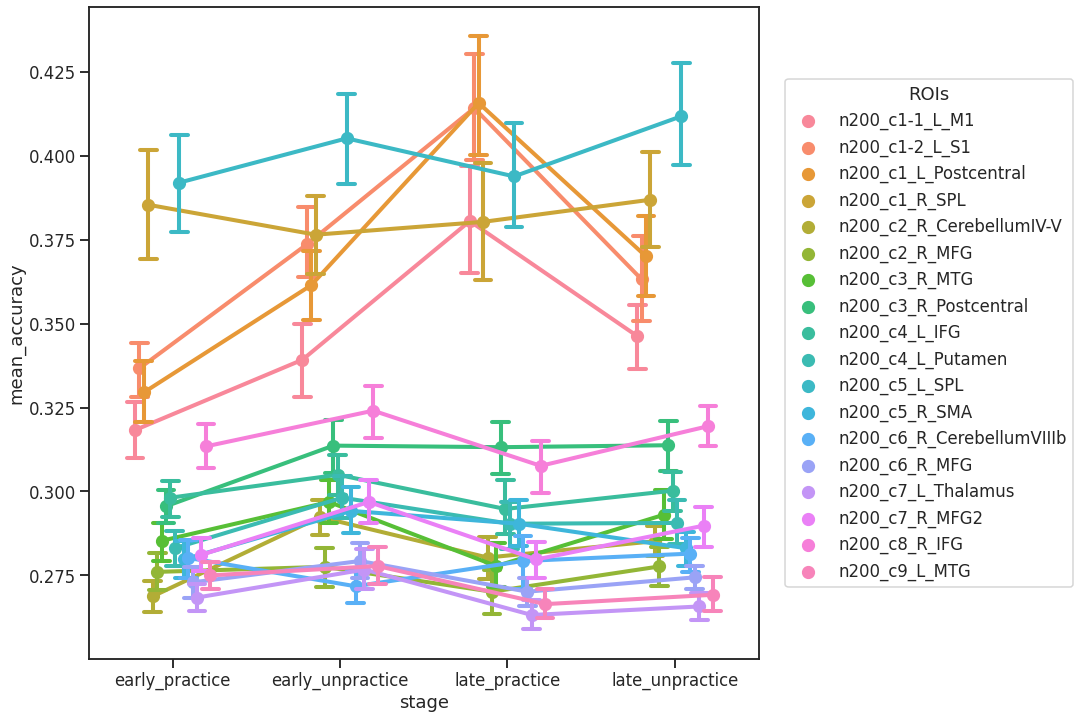

In [8]:
plt.figure(figsize=(12,12))
GA.plot_df_score(legend_outside=True)

0

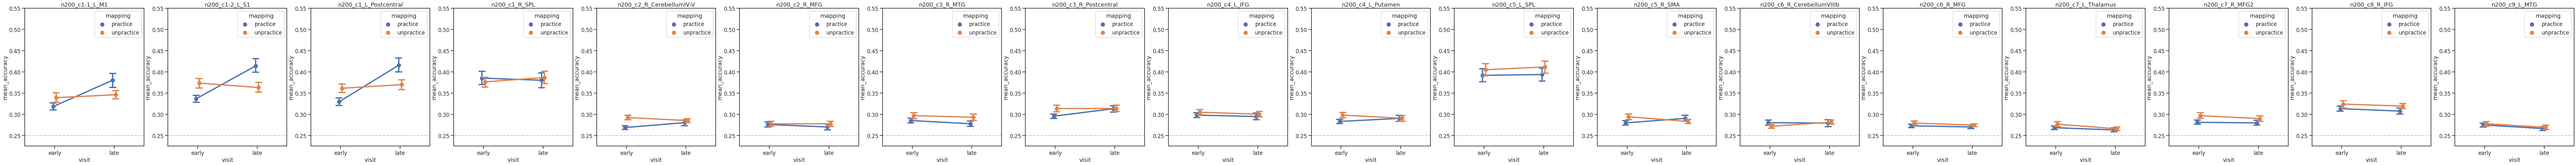

In [9]:
GA.plot_decacc(figsize=(8,8), ylim=(.225, .55), hline=.25)
# plt.savefig(join(GA.dir_git,'GA','images',"%s_decacc.%s.png"%(GA.today, suffix)))

0

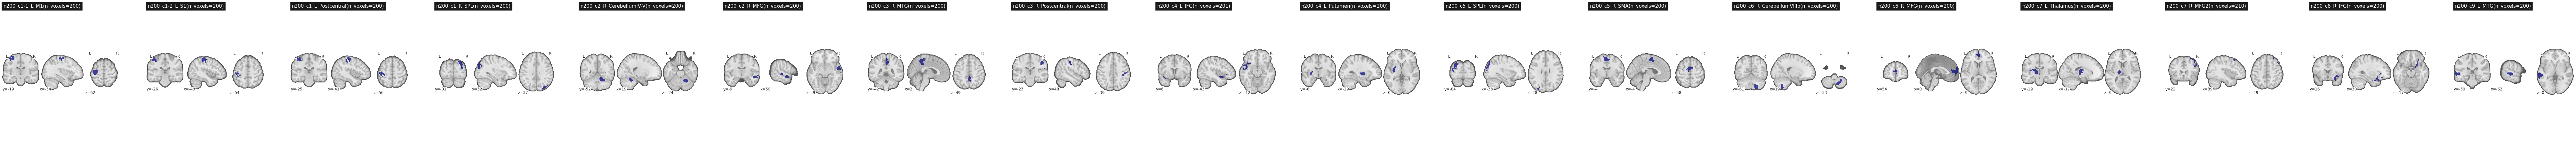

In [10]:
GA.plot_rois(figsize=(8,8))
# plt.savefig(join(GA.dir_git,'GA','images',"%s_rois.%s.png"%(GA.today, suffix)))

## 5. t-test

In [15]:
GA.do_paired_ttest(cond_A='early_practice', cond_B='late_practice', data=GA.df_score, alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,n200_c1-1_L_M1,early_practice,late_practice,-3.958274,0.000448,True,0.000448
1,n200_c1-2_L_S1,early_practice,late_practice,-4.112568,0.000294,True,0.000294
2,n200_c1_L_Postcentral,early_practice,late_practice,-4.574044,0.000083,True,0.000083
3,n200_c1_R_SPL,early_practice,late_practice,0.384519,0.703399,False,0.703399
4,n200_c2_R_CerebellumIV-V,early_practice,late_practice,-1.865849,0.072207,False,0.072207
5,n200_c2_R_MFG,early_practice,late_practice,0.657484,0.516055,False,0.516055
6,n200_c3_R_MTG,early_practice,late_practice,0.948662,0.350632,False,0.350632
7,n200_c3_R_Postcentral,early_practice,late_practice,-1.926143,0.063940,False,0.063940
8,n200_c4_L_IFG,early_practice,late_practice,0.379831,0.706838,False,0.706838
9,n200_c4_L_Putamen,early_practice,late_practice,-0.863909,0.394728,False,0.394728


In [13]:
GA.do_paired_ttest(cond_A='early_practice', cond_B='late_practice', data=GA.df_score, alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,n200_c1-1_L_M1,early_practice,late_practice,-3.958274,0.000448,True,0.000448
1,n200_c1-2_L_S1,early_practice,late_practice,-4.112568,0.000294,True,0.000294
2,n200_c1_L_Postcentral,early_practice,late_practice,-4.574044,0.000083,True,0.000083
3,n200_c1_R_SPL,early_practice,late_practice,0.384519,0.703399,False,0.703399
4,n200_c2_R_CerebellumIV-V,early_practice,late_practice,-1.865849,0.072207,False,0.072207
5,n200_c2_R_MFG,early_practice,late_practice,0.657484,0.516055,False,0.516055
6,n200_c3_R_MTG,early_practice,late_practice,0.948662,0.350632,False,0.350632
7,n200_c3_R_Postcentral,early_practice,late_practice,-1.926143,0.063940,False,0.063940
8,n200_c4_L_IFG,early_practice,late_practice,0.379831,0.706838,False,0.706838
9,n200_c4_L_Putamen,early_practice,late_practice,-0.863909,0.394728,False,0.394728


In [14]:
GA.do_1sample_ttest(stage='early_practice', data=GA.df_score, mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,n200_c1-1_L_M1,early_practice,7.921364,9.780284e-09,True,9.780284e-09
1,n200_c1-2_L_S1,early_practice,10.376136,2.837046e-11,True,2.837046e-11
2,n200_c1_L_Postcentral,early_practice,8.703611,1.394858e-09,True,1.394858e-09
3,n200_c1_R_SPL,early_practice,8.705170,1.389568e-09,True,1.389568e-09
4,n200_c2_R_CerebellumIV-V,early_practice,3.806147,6.754291e-04,True,6.754291e-04
5,n200_c2_R_MFG,early_practice,4.603222,7.631301e-05,True,7.631301e-05
6,n200_c3_R_MTG,early_practice,5.928895,1.936223e-06,True,1.936223e-06
7,n200_c3_R_Postcentral,early_practice,9.022293,6.455393e-10,True,6.455393e-10
8,n200_c4_L_IFG,early_practice,8.821986,1.046072e-09,True,1.046072e-09
9,n200_c4_L_Putamen,early_practice,6.371906,5.772277e-07,True,5.772277e-07
